# Meachine Learning

Kelompok 2 :
- Thesion Marta Sianipar (1206210004)
- Angel Br Tarigan (1206210013)
- Miranthy Pramita Ningtyas (1206210015)
- Ananda Taqhsya Dwiyana (1206210019)

# Menggali Insight Pelanggan melalui Analisis Klaster: Pendekatan Terpadu PCA, Kmeans, dan SOM

# Deskripsi Data

Dataset "customer data" ini memberikan informasi yang sangat berharga tentang kebiasaan keuangan pelanggan. Dengan menyajikan data seperti saldo, frekuensi pembelian, jenis pembelian, penarikan tunai, batas kredit, dan lainnya, dataset ini memungkinkan untuk memahami perilaku keuangan pelanggan secara rinci. Dengan demikian, analisis terhadap dataset ini dapat memberikan wawasan mendalam tentang bagaimana pelanggan berinteraksi dengan produk keuangan, membantu perusahaan dalam mengidentifikasi tren, kebutuhan pelanggan, dan bahkan potensial risiko keuangan. Selain itu, keberadaan variabel seperti pembayaran minimum dan persentase pembayaran penuh memungkinkan penilaian terhadap tingkat kesehatan keuangan pelanggan, yang dapat menjadi dasar untuk strategi manajemen risiko dan pengambilan keputusan yang lebih baik dalam industri keuangan.

https://github.com/ThesionMS/UTS-MachineLearning-Semester5

# Metadata

Ini adalah metadata untuk setiap kolom dalam suatu dataset:

0. `CUST_ID`: ID Pelanggan, tipe data objek (string), dengan 8950 entri non-null.
1. `BALANCE`: Saldo.
2. `BALANCE_FREQUENCY`: Frekuensi Saldo.
3. `PURCHASES`: Pembelian.
4. `ONEOFF_PURCHASES`: Pembelian Sekali Bayar.
5. `INSTALLMENTS_PURCHASES`: Pembelian Angsuran.
6. `CASH_ADVANCE`: Penarikan Tunai.
7. `PURCHASES_FREQUENCY`: Frekuensi Pembelian.
8. `ONEOFF_PURCHASES_FREQUENCY`: Frekuensi Pembelian Sekali Bayar.
9. `PURCHASES_INSTALLMENTS_FREQUENCY`: Frekuensi Pembelian Angsuran.
10. `CASH_ADVANCE_FREQUENCY`: Frekuensi Penarikan Tunai.
11. `CASH_ADVANCE_TRX`: Jumlah Transaksi Penarikan Tunai.
12. `PURCHASES_TRX`: Jumlah Transaksi Pembelian.
13. `CREDIT_LIMIT`: Batas Kredit.
14. `PAYMENTS`: Pembayaran.
15. `MINIMUM_PAYMENTS`: Pembayaran Minimum.
16. `PRC_FULL_PAYMENT`: Persentase Pembayaran Penuh.
17. `TENURE`: Jangka Waktu (Tenure).

# Import Library

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from minisom import MiniSom
from sklearn_som.som import SOM

In [76]:
# !pip install sklearn_som

# Read Data

In [77]:
df = pd.read_csv("2. Customer Data.csv")

In [78]:
df.size

161100

In [79]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Prepocessing Data

## Missing Value

In [81]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [82]:
df.drop('CUST_ID', axis=1, inplace=True)

(array([8.532e+03, 6.500e+01, 2.100e+01, 1.100e+01, 1.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([1.91630000e-02, 7.64063800e+03, 1.52812568e+04, 2.29218757e+04,
        3.05624945e+04, 3.82031133e+04, 4.58437322e+04, 5.34843510e+04,
        6.11249698e+04, 6.87655887e+04, 7.64062075e+04]),
 <BarContainer object of 10 artists>)

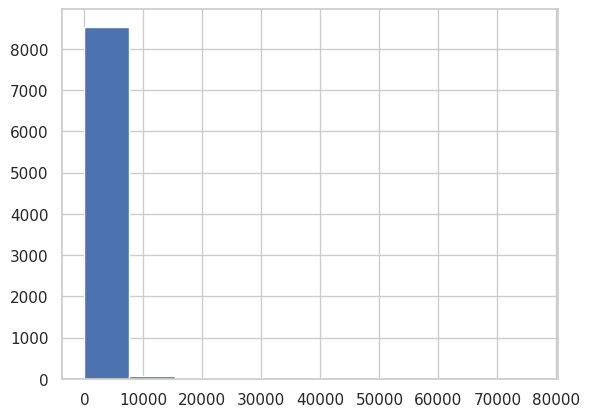

In [83]:
plt.hist(df['MINIMUM_PAYMENTS'])

In [84]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

Terdapat missing value pada kolom 'MINIMUM_PAYMENTS' sebanyak 313, sehingga mengganti missing value menggunakan median karena data tersebut tidak berdistribusi normal

(array([4.583e+03, 2.095e+03, 1.326e+03, 5.780e+02, 2.150e+02, 1.090e+02,
        3.300e+01, 6.000e+00, 1.000e+00, 3.000e+00]),
 array([   50.,  3045.,  6040.,  9035., 12030., 15025., 18020., 21015.,
        24010., 27005., 30000.]),
 <BarContainer object of 10 artists>)

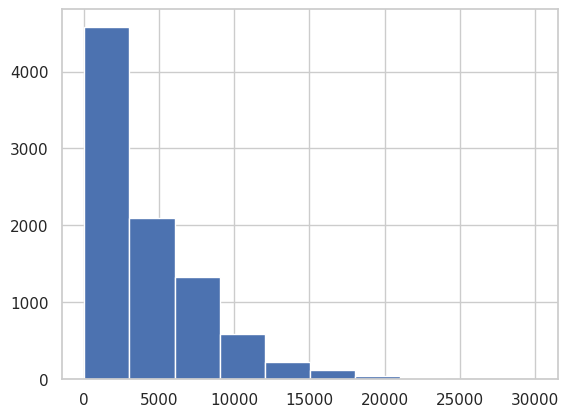

In [85]:
plt.hist(df['CREDIT_LIMIT'])

In [86]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

Terdapat 1 missing value pada kolom 'CREDIT_LIMIT' , sehingga mengganti missing value menggunakan median karena data tersebut seperti 'MINIMUM_PAYMENTS' tidak berdistribusi normal

(array([6.546e+03, 1.333e+03, 5.770e+02, 2.790e+02, 1.350e+02, 4.000e+01,
        2.100e+01, 1.100e+01, 6.000e+00, 2.000e+00]),
 array([    0.      ,  1904.313856,  3808.627712,  5712.941568,
         7617.255424,  9521.56928 , 11425.883136, 13330.196992,
        15234.510848, 17138.824704, 19043.13856 ]),
 <BarContainer object of 10 artists>)

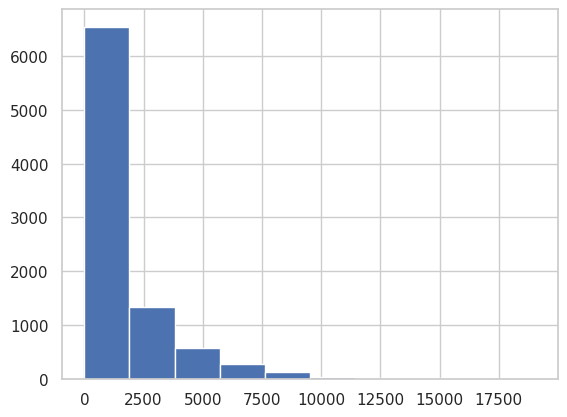

In [87]:
plt.hist(df['BALANCE'])

Dengan memplot histogram dari kolom 'BALANCE', kita dapat melihat sebaran nilai saldo pelanggan. Histogram ini memberikan gambaran tentang distribusi frekuensi nilai saldo, ternyata terdapat puncak pada histogram ini pada nilai 0-2500 sehingga dapat menunjukkan nilai saldo yang lebih umum atau kumpulan nilai saldo yang mendominasi.

## Menampilkan distribusi data

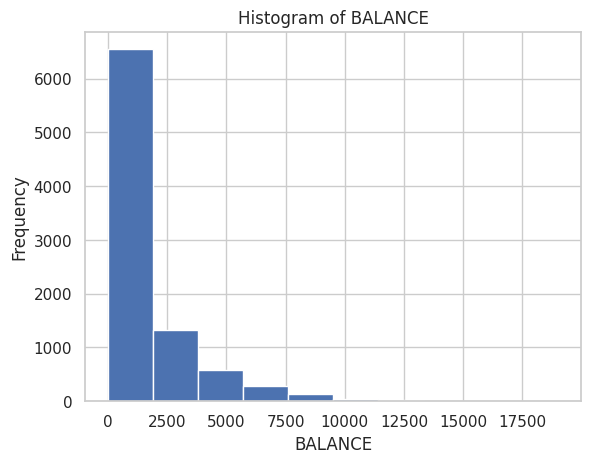

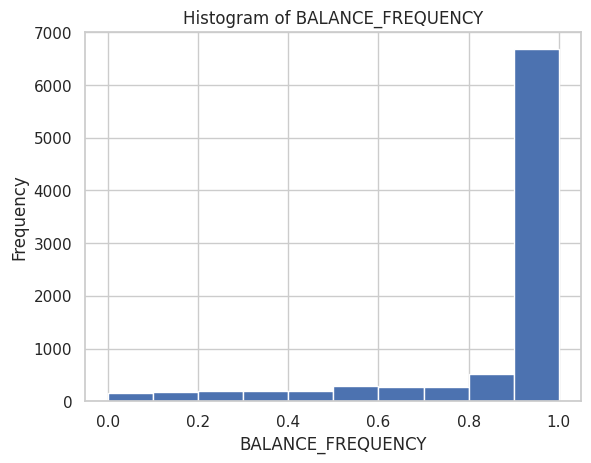

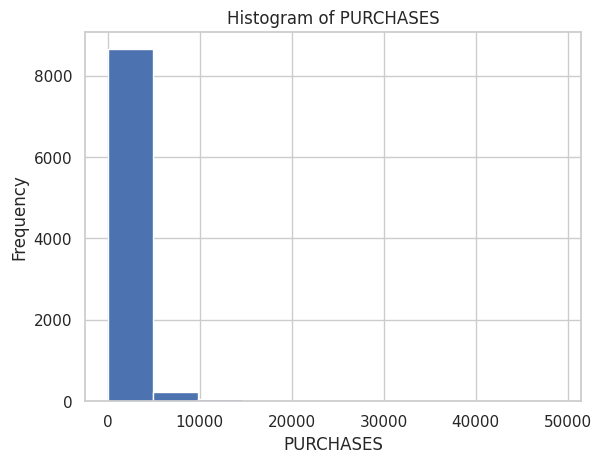

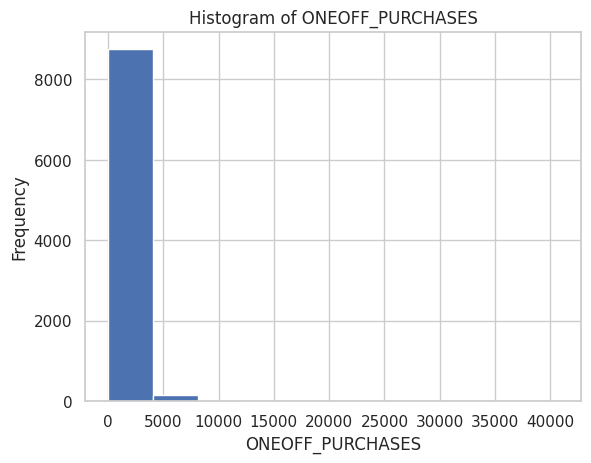

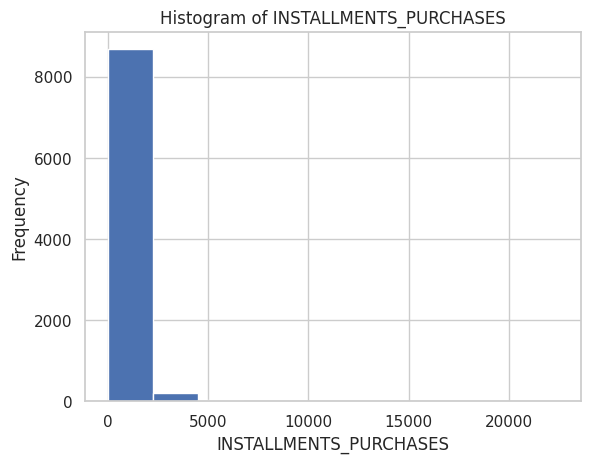

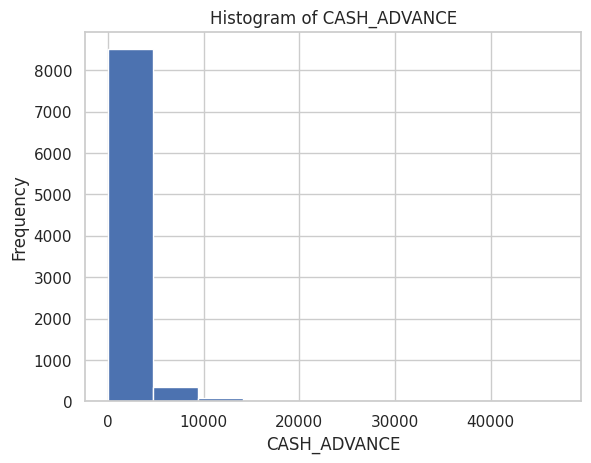

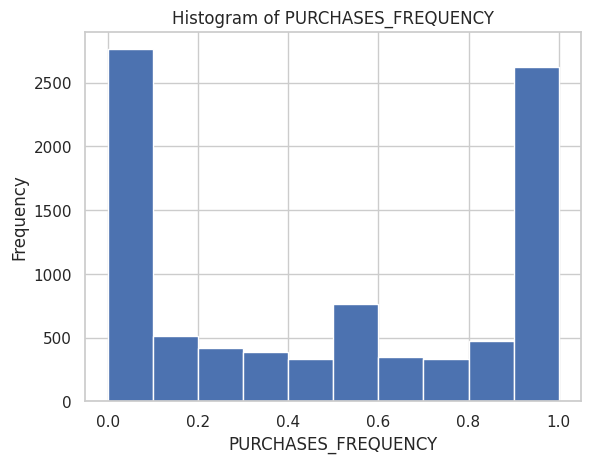

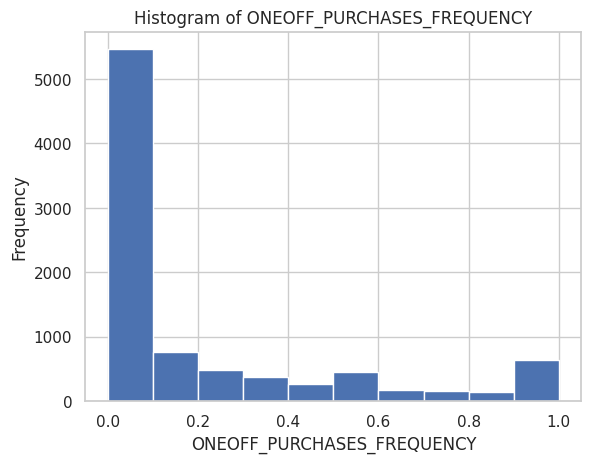

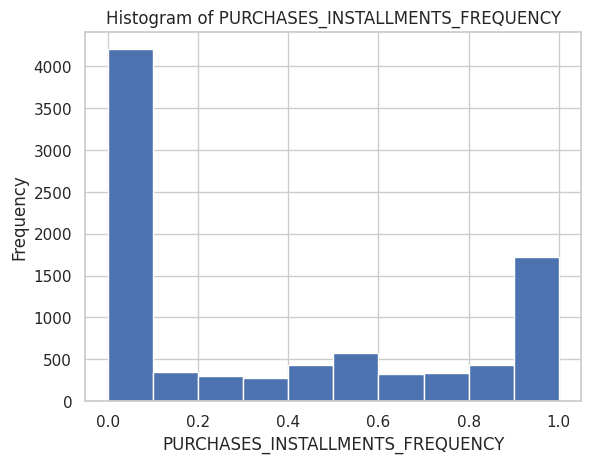

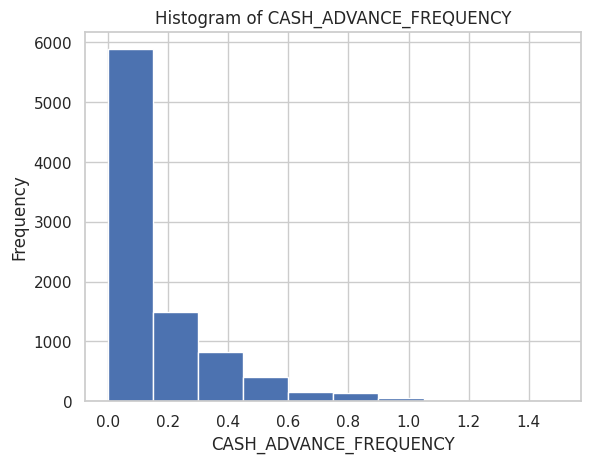

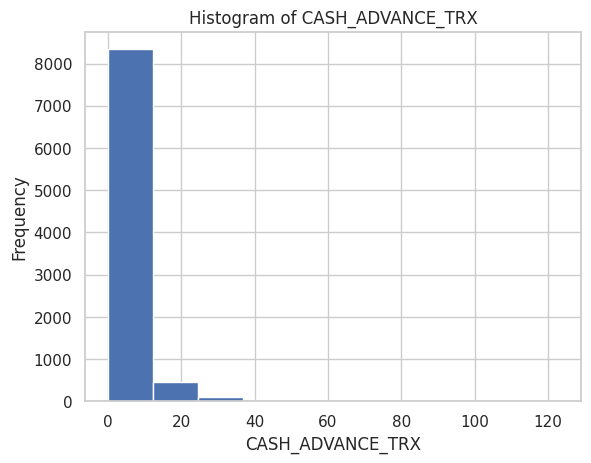

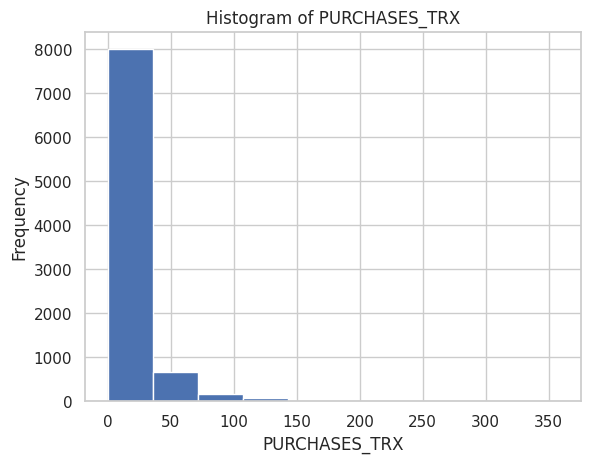

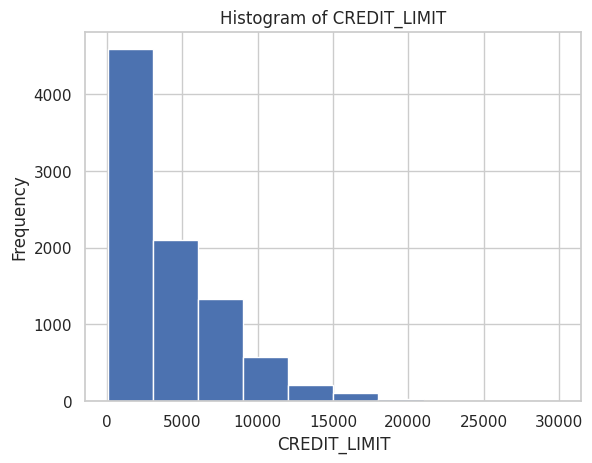

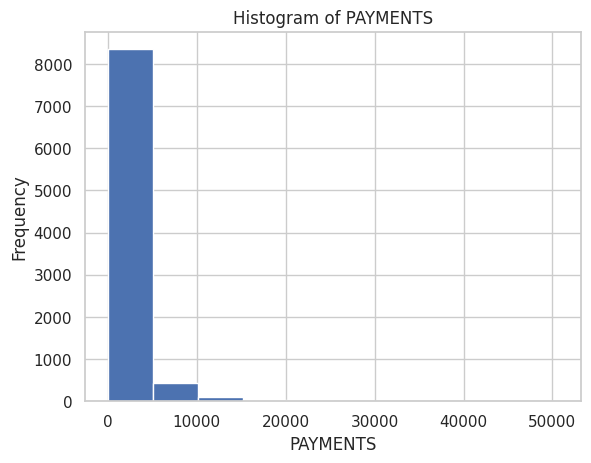

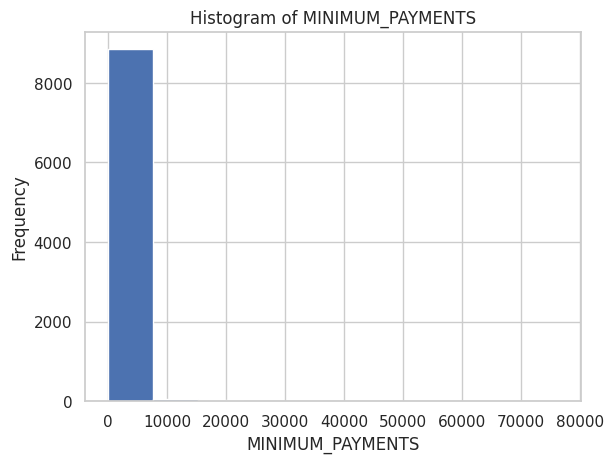

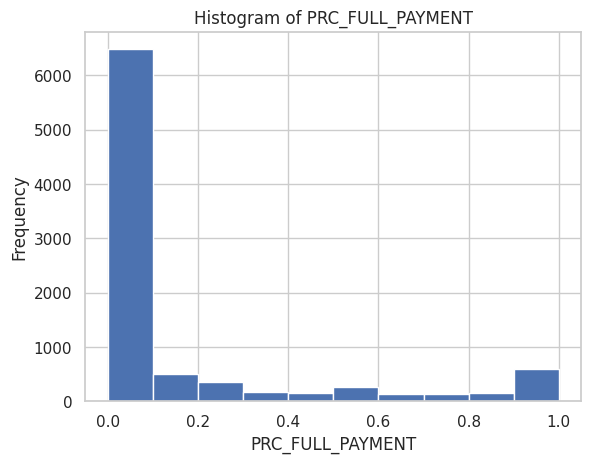

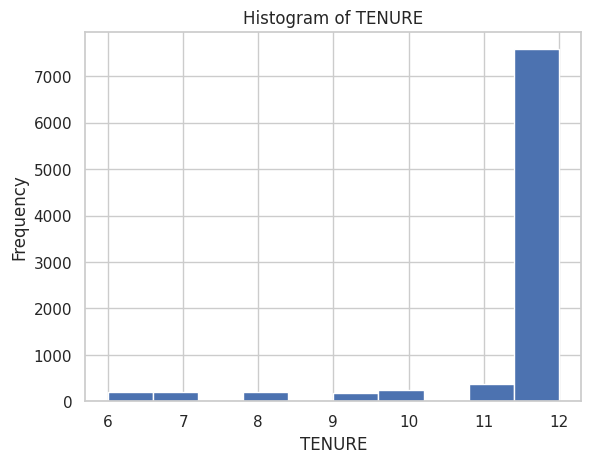

In [88]:
import matplotlib.pyplot as plt

def plot_histograms_for_all_columns(df):
    for column in df.columns:
        plt.hist(df[column])
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Panggil fungsi ini dengan DataFrame Anda
plot_histograms_for_all_columns(df)


Berdasarkan histogram yang dihasilkan untuk setiap kolom dalam data pelanggan, beberapa pola distribusi dapat diidentifikasi. Saldo sebagian besar pelanggan cenderung rendah, dengan sejumlah kecil pelanggan memiliki saldo yang signifikan. Frekuensi pembaruan saldo cenderung tinggi, meskipun ada beberapa pelanggan dengan frekuensi yang lebih rendah. Volume pembelian mayoritas pelanggan relatif rendah, tetapi terdapat kelompok pelanggan yang melakukan pembelian besar. Penarikan tunai jarang dilakukan oleh sebagian besar pelanggan, namun ada beberapa pelanggan yang sering melakukan penarikan dalam jumlah besar.  Dengan interpretasi tersebut dapat disimpulkan bahwa data tidak berdistribusi normal.

# EDA

## Menampilkan Hubungan antar variabel

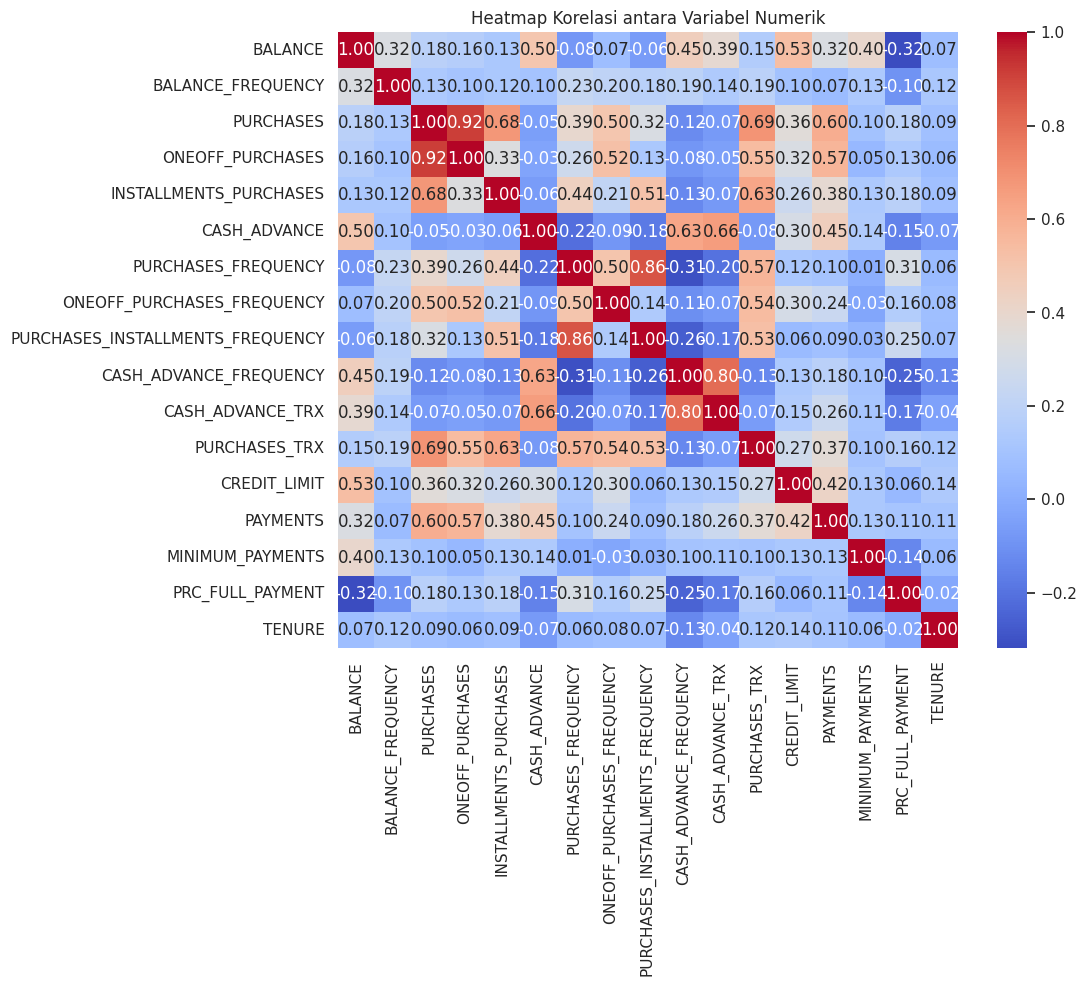

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Variabel Numerik')
plt.show()

**Hasil Interpretasi** :

Dari hasil heatmap korelasi, terlihat bahwa terdapat korelasi positif kuat antara total pembelian (PURCHASES) dan pembelian sekali (ONEOFF_PURCHASES), yang mengindikasikan bahwa pelanggan yang sering melakukan pembelian besar-besaran juga cenderung melakukan lebih banyak pembelian kecil secara reguler. Selain itu, korelasi positif kuat antara frekuensi pembelian dalam angsuran (PURCHASES_INSTALLMENTS_FREQUENCY) dan frekuensi pembelian secara umum (PURCHASES_FREQUENCY) menunjukkan bahwa pelanggan yang suka melakukan pembelian dengan angsuran juga aktif dalam melakukan pembelian secara umum. Di sisi lain, korelasi positif kuat antara jumlah transaksi penarikan tunai (CASH_ADVANCE_TRX) dan frekuensi penarikan tunai (CASH_ADVANCE_FREQUENCY) menunjukkan bahwa pelanggan yang sering melakukan penarikan tunai cenderung melakukan lebih banyak transaksi penarikan tunai secara keseluruhan.

Terdapat juga beberapa korelasi yang lebih lemah namun masih signifikan. Sebagai contoh, korelasi positif sedang antara pembelian sekali (ONEOFF_PURCHASES) dan frekuensi pembelian sekali (ONEOFF_PURCHASES_FREQUENCY) mengindikasikan bahwa pelanggan yang melakukan pembelian sekali cenderung melakukannya secara teratur. Selain itu, korelasi negatif sedang antara batas kredit (CREDIT_LIMIT) dan jumlah transaksi pembelian (PURCHASES_TRX) menunjukkan bahwa pelanggan dengan batas kredit lebih rendah cenderung melakukan lebih sedikit transaksi pembelian. Korelasi negatif lemah antara frekuensi pembelian (PURCHASES_FREQUENCY) dan frekuensi penarikan tunai (CASH_ADVANCE_FREQUENCY) menggambarkan bahwa pelanggan yang sering melakukan pembelian umumnya kurang sering melakukan penarikan tunai, mungkin karena preferensi untuk pembayaran elektronik.

## VIS 1 : Hubungan antara PURCHASE & CASH ADVANCE


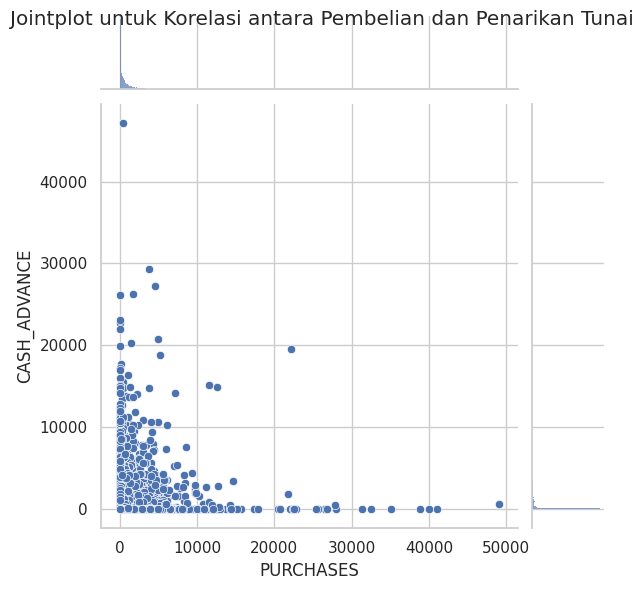

In [90]:
sns.set(style="whitegrid")
sns.jointplot(x='PURCHASES', y='CASH_ADVANCE', data=df, kind='scatter')
plt.suptitle('Jointplot untuk Korelasi antara Pembelian dan Penarikan Tunai')
plt.show()


hasil interpretasi :

Dari visualisasi yang dihasilkan, grafik menunjukkan hubungan antara kolom 'Purchases' dan 'Cash Advance'. Dapat dilihat bahwa mayoritas data terkumpul di bagian bawah, menunjukkan titik pembelian yang lebih rendah dan penarikan tunai yang juga cenderung lebih rendah. Hal ini menunjukkan kurangnya korelasi antara volume pembelian dan penarikan tunai.

Namun, ada beberapa titik data yang tersebar di bagian atas, menunjukkan pembelian yang lebih tinggi dengan penarikan tunai yang juga lebih tinggi. Meskipun tidak merata, keberadaan titik-titik ini menunjukkan adanya sedikit hubungan antara penarikan tunai dan pembelian dalam jumlah besar.

Kesimpulannya, sebagian besar pelanggan cenderung memiliki kecenderungan pembelian dan penarikan tunai dalam volume yang lebih rendah, sementara sejumlah kecil pelanggan yang melakukan pembelian besar juga cenderung melakukan penarikan tunai dalam volume besar.

## VIS 2 : Hubungan antara BALANCE dan PURCHASES dengan Regresi

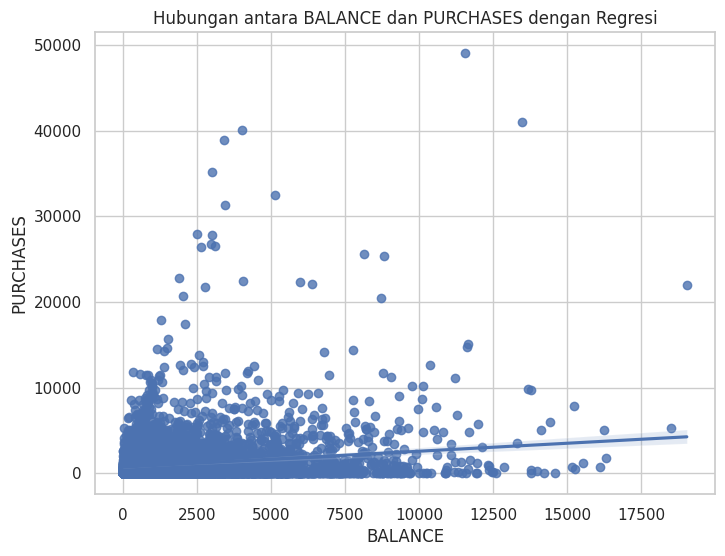

In [91]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='BALANCE', y='PURCHASES')
plt.title('Hubungan antara BALANCE dan PURCHASES dengan Regresi')
plt.show()

Hasil Interpretasi:

- jika scatter plot menunjukkan garis regresi yang cenderung naik dari kiri ke kanan dan titik data berkelompok relatif rapat di sekitar garis regresi, maka dapat disimpulkan bahwa terdapat hubungan positif antara saldo dan total pembelian.

- sehingga, pelanggan dengan saldo yang lebih tinggi cenderung melakukan pembelian dengan jumlah yang lebih besar.

- terdapat sejumlah besar titik data yang tersebar luas dan tidak mengikuti pola garis regresi, maka dapat menunjukkan kurangnya korelasi antara saldo dan pembelian, atau adanya faktor lain yang memengaruhi perilaku pembelian pelanggan.

## VIS 3 - Perbandingan Proporsi One-off dengan Installmen Purchess

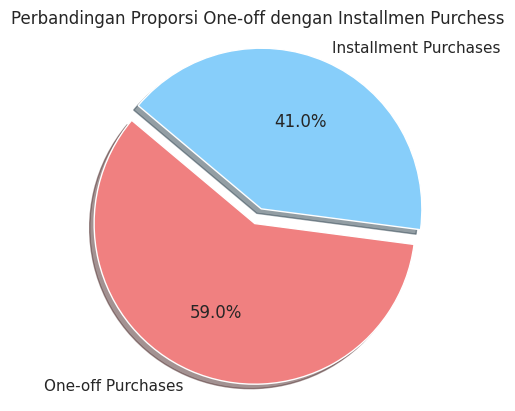

In [92]:
# Visualisasi proporsi pembelian sekali vs. angsuran
labels = 'One-off Purchases', 'Installment Purchases'
sizes = [df['ONEOFF_PURCHASES'].sum(), df['INSTALLMENTS_PURCHASES'].sum()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Pemisahan potongan "One-off Purchases"
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Perbandingan Proporsi One-off dengan Installmen Purchess')
plt.show()


Hasil interpretasi :

sebagian besar dari total pembelian adalah dari kategori pembelian sekali (one-off purchases) sebesar 59%, sementara sisanya adalah dari kategori angsuran (installment purchases) sebesar 41%. Jumlah persentase akan memberikan gambaran proporsi relatif dari setiap jenis pembelian terhadap total keseluruhan.

## VIS 4 - Distribusi BALANCE berdasarkan TENURE

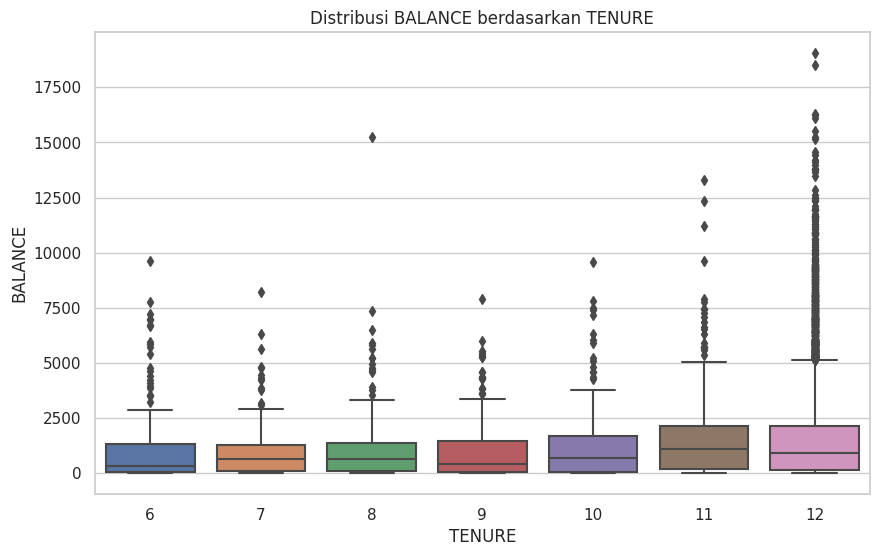

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TENURE', y='BALANCE')
plt.title('Distribusi BALANCE berdasarkan TENURE')
plt.show()

Hasil Interpretasi :

1. **Outliers (Poin Tidak Biasa):** Setelah analisis lebih lanjut, ditemukan bahwa ada beberapa pelanggan dengan masa jabatan yang relatif pendek memiliki saldo yang jauh lebih tinggi daripada yang diharapkan. Hal ini mungkin menunjukkan adanya pelanggan baru dengan saldo awal yang besar atau mungkin juga adanya kesalahan dalam data.

2. **Perbedaan Distribusi Saldo:** Terdapat perbedaan yang signifikan antara distribusi saldo antara kelompok TENURE. Pelanggan dengan masa jabatan yang lebih lama cenderung memiliki variasi saldo yang lebih rendah dan lebih stabil, sementara pelanggan baru memiliki variasi saldo yang lebih tinggi.

3. **Perbedaan Tren atau Pola:** Ditemukan bahwa seiring dengan peningkatan TENURE, rata-rata saldo cenderung stabil atau mengalami penurunan bertahap. Namun, pada beberapa titik, terutama pada TENURE yang pendek, terjadi lonjakan dalam rata-rata saldo yang kemungkinan disebabkan oleh faktor-faktor tertentu yang mempengaruhi kelompok pelanggan tersebut.

4. **Analisis Statistik Lebih Lanjut:** Rata-rata saldo pelanggan dengan TENURE yang lebih lama cenderung lebih rendah daripada pelanggan baru. Perbedaan statistik ini menunjukkan adanya pola di mana pelanggan yang telah menjadi pelanggan dalam jangka waktu yang lama cenderung memiliki saldo yang lebih stabil dan lebih rendah.

Kesimpulan ini menyoroti adanya perbedaan perilaku keuangan antara pelanggan dengan masa jabatan yang berbeda. Ini dapat menjadi landasan untuk keputusan bisnis terkait strategi pemasaran, penawaran produk, atau layanan yang disesuaikan dengan karakteristik pelanggan berdasarkan masa jabatan mereka.

# PCA

Penggunaan Principal Component Analysis (PCA) pada data dapat dijelaskan sebagai metode untuk mengurangi dimensi, mempertahankan informasi signifikan, mengatasi multikolinearitas, dan mempercepat algoritma machine learning. PCA membantu menghasilkan kombinasi linear baru dari variabel yang ada, memungkinkan analisis yang lebih efisien dan fokus pada fitur-fitur yang paling relevan. Meskipun PCA membawa manfaat dalam mereduksi dimensi dan mengatasi masalah multikolinearitas, keputusan untuk menggunakannya harus mempertimbangkan trade-off antara kompleksitas model dan interpretabilitas hasil.

## Standarisasi Data

Standarisasi data sebelum menerapkan PCA penting karena PCA sensitif terhadap perbedaan skala antar variabel. Standarisasi memastikan bahwa setiap variabel memberikan kontribusi sebanding terhadap komponen utama, mengurangi pengaruh outlier, dan memudahkan perbandingan antar variabel. Hal ini juga memastikan konsistensi hasil PCA dan memungkinkan analisis komponen utama untuk menghasilkan representasi yang akurat tentang struktur variasi dalam data. Dengan standarisasi, PCA dapat lebih efektif mengekstraksi informasi penting dari data.

In [94]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
X

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

# Hitung nilai Eigen Value & Eigen Vector

In [95]:
# Menggantikan NaN dengan nilai rata-rata kolom
X = np.nan_to_num(X, nan=np.nanmean(X, axis=0))

# Perhitungan matriks kovarian setelah membersihkan NaN
mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0] - 1)

In [96]:
mean_vec = np.mean(X, axis=0)
cov_mat = (X-mean_vec).T.dot((X-mean_vec))/(X.shape[0]-1)
print('Matriks Covarian \n%s'%cov_mat)

Matriks Covarian 
[[ 1.00011174  0.32244833  0.181281    0.16436802  0.12648316  0.49674704
  -0.07795245  0.07317426 -0.06319282  0.44926823  0.38519531  0.15435561
   0.53135553  0.32283773  0.39796451 -0.31899484  0.07270039]
 [ 0.32244833  1.00011174  0.13368937  0.10433488  0.12430607  0.0993991
   0.22974114  0.20243794  0.17609907  0.19189412  0.14157068  0.18964713
   0.095942    0.06501513  0.13119544 -0.09509307  0.11978927]
 [ 0.181281    0.13368937  1.00011174  0.91694701  0.67997219 -0.05147997
   0.39306135  0.49848543  0.31560195 -0.12015662 -0.06718279  0.68963789
   0.35701681  0.60333124  0.09579955  0.18039922  0.08629784]
 [ 0.16436802  0.10433488  0.91694701  1.00011174  0.33065849 -0.0313292
   0.26496691  0.52494974  0.12774338 -0.08263698 -0.04621732  0.54558424
   0.3197705   0.56735501  0.05026187  0.1327776   0.06415719]
 [ 0.12648316  0.12430607  0.67997219  0.33065849  1.00011174 -0.06425086
   0.44246712  0.21406635  0.51140797 -0.13233318 -0.07400745  0.6

<Axes: >

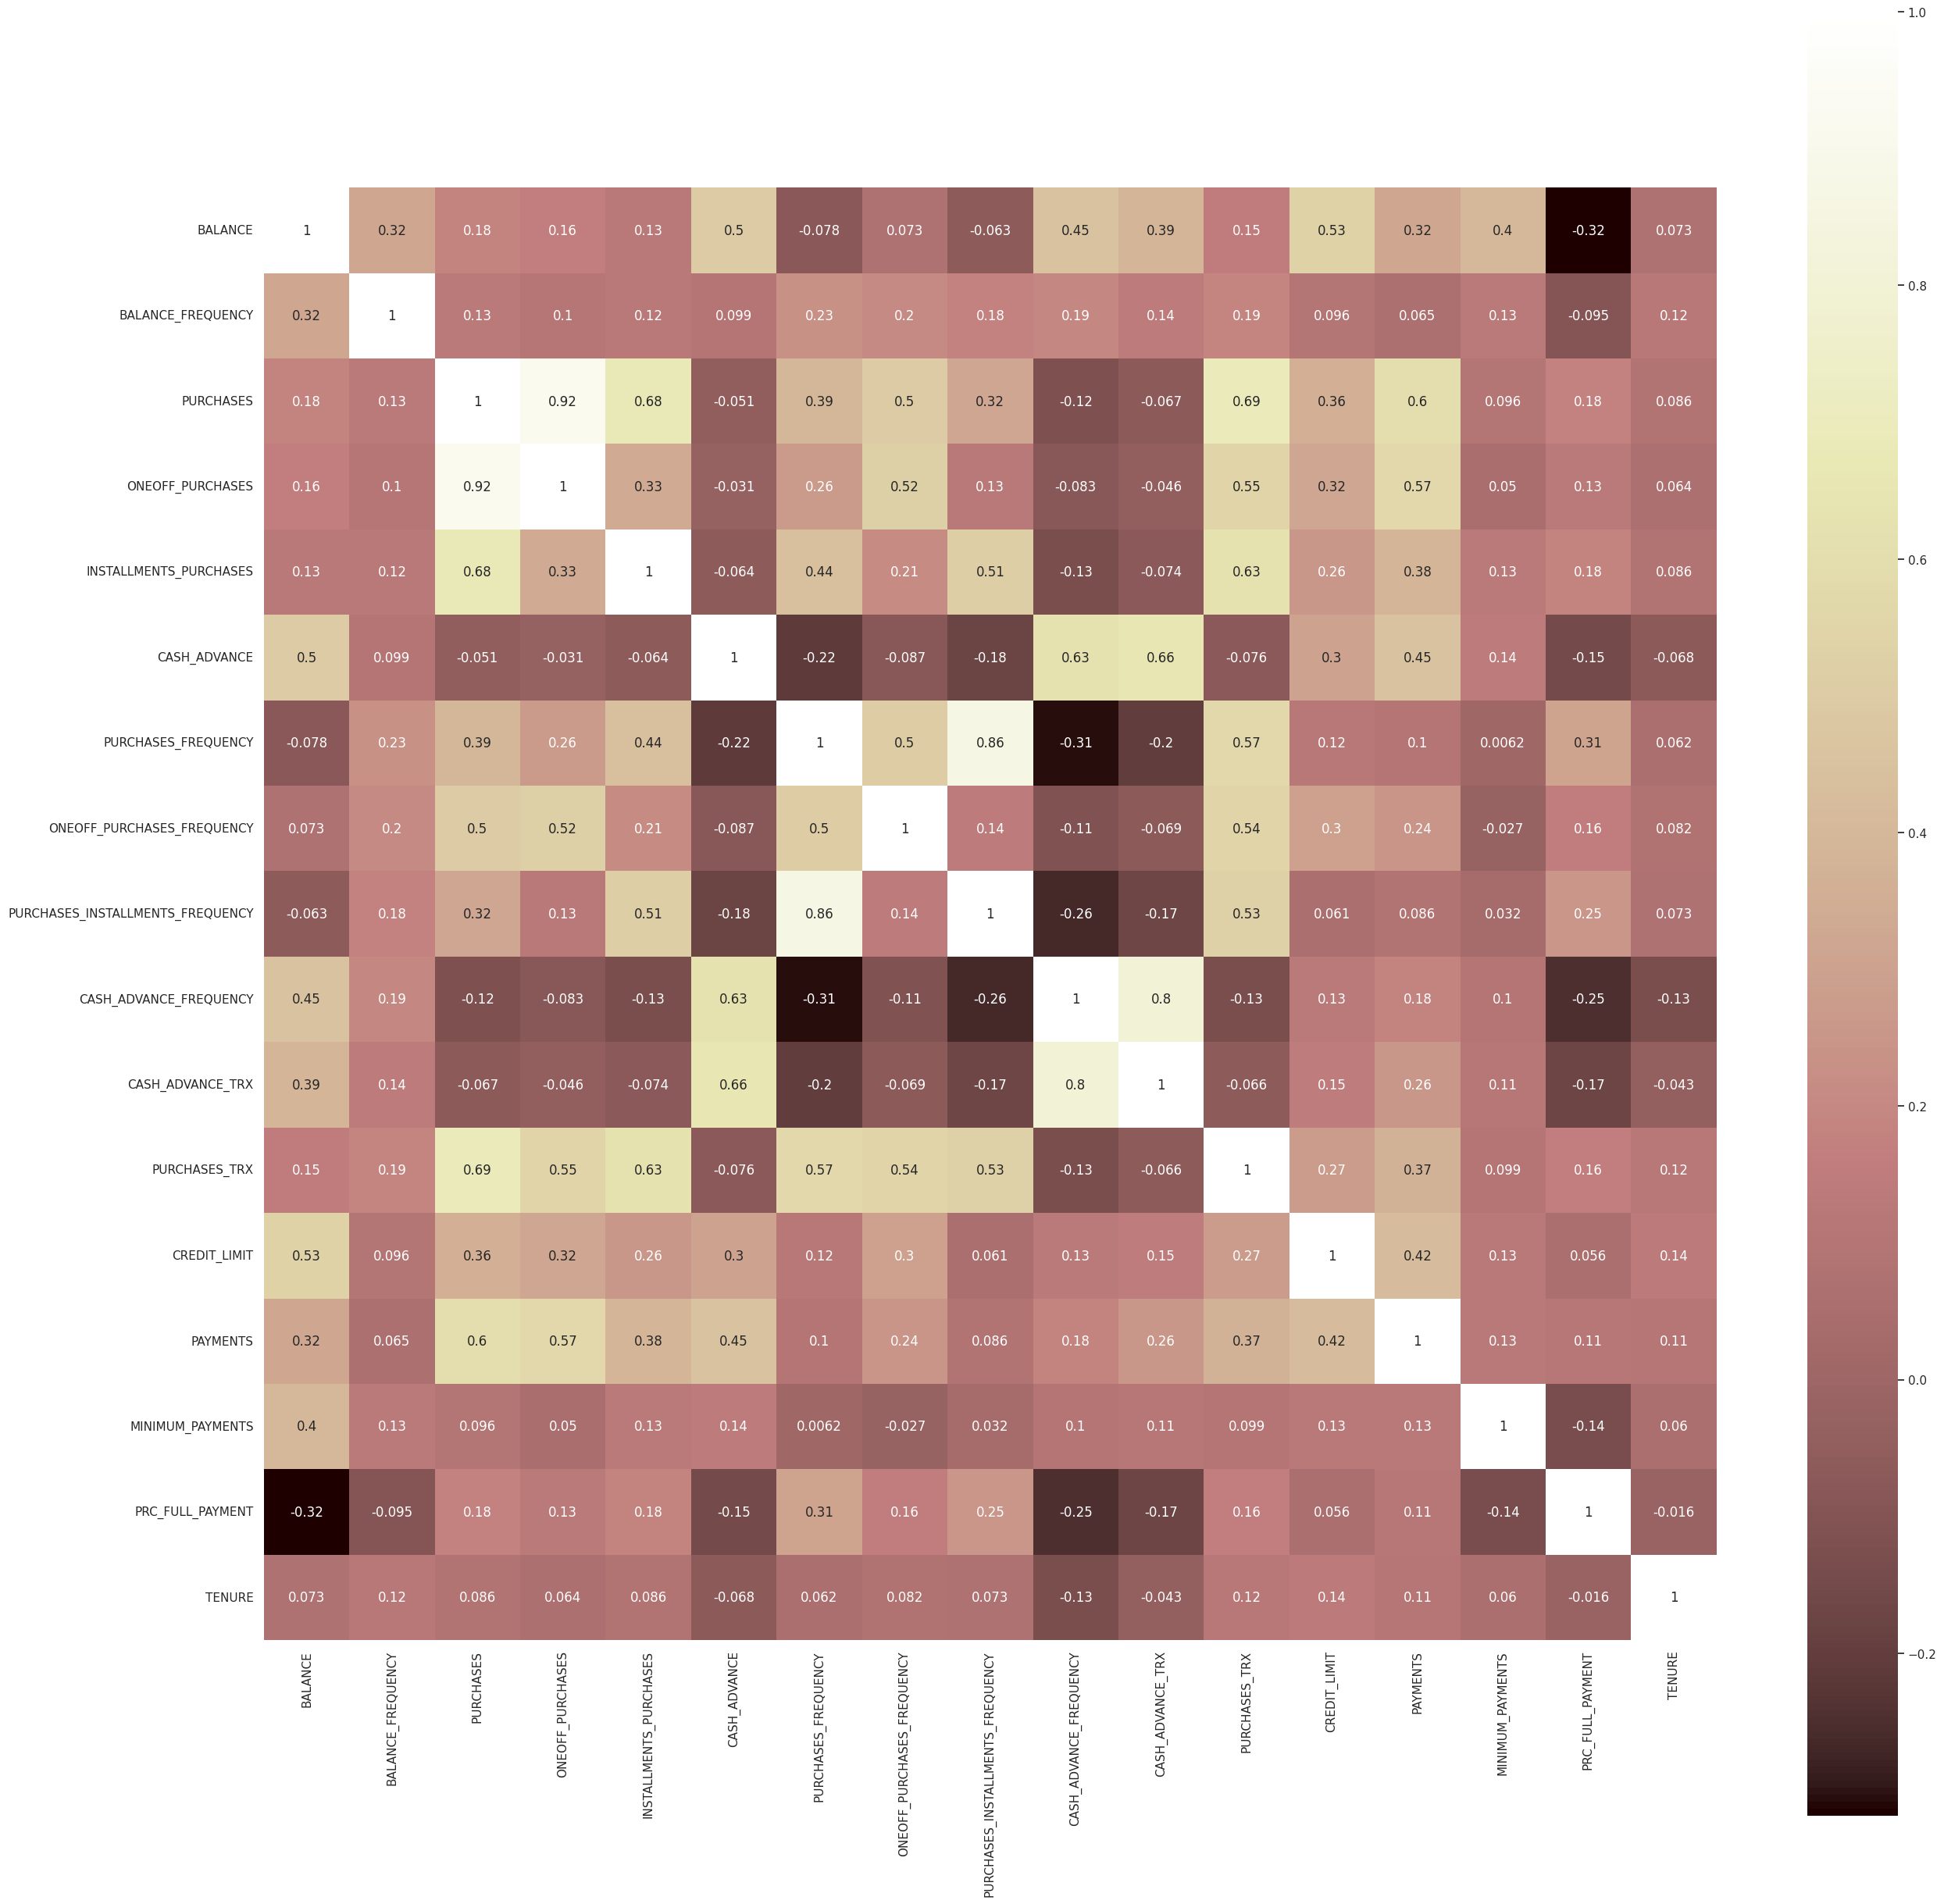

In [97]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix,vmax=1,square=True,annot=True, cmap='pink')

In [98]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("eigen vector \n%s" %eig_vecs)
print("eigen value \n%s" %eig_vals)

eigen vector 
[[ 1.01734968e-01  4.03818730e-01 -1.61631980e-01 -2.79316406e-01
   5.10222490e-02  4.27515633e-02  2.54181627e-01  1.70293511e-01
  -1.28513756e-01 -3.11740599e-02  1.48486084e-01 -4.80669445e-01
  -5.24791875e-01 -1.74537715e-01  2.18911865e-01  5.24974212e-03
  -4.21602874e-05]
 [ 1.20490410e-01  1.31344137e-01 -4.22995451e-01 -1.55761725e-01
  -4.76836195e-01  2.20449530e-02 -1.00800864e-01 -2.83495851e-01
  -6.16254250e-01  8.15805443e-02 -1.18901405e-01  9.13996899e-02
   1.84842432e-01  4.11693186e-02  4.19293917e-02  1.08911852e-02
  -7.97922001e-06]
 [ 4.11562397e-01  4.00246231e-02  2.57474232e-01 -4.16208251e-02
   2.78870186e-02  1.80452550e-01 -2.00220478e-01 -2.60546351e-02
  -1.04777325e-01 -5.11626981e-02  2.00786754e-01  7.48724617e-02
  -1.14177416e-01  2.25137893e-01 -5.16979718e-02 -2.15918367e-03
   7.48974797e-01]
 [ 3.46334163e-01  6.19177177e-02  3.90899189e-01 -8.50790918e-02
  -1.60838810e-01  1.79983751e-01 -1.20684901e-01 -1.26973580e-01
  -1.

# Memilih Principal Component

In [99]:
# Membuat list dari nilai eigen dan vector eigen menjadi tuple
eigen_pairs = [(eig_vals[i], eig_vecs[:, i]) for i in range(len(eig_vals))]
eigen_pairs

[(4.641122690146693,
  array([ 0.10173497,  0.12049041,  0.4115624 ,  0.34633416,  0.33676092,
         -0.02280988,  0.32123217,  0.29449254,  0.27449428, -0.08858206,
         -0.04813551,  0.39059872,  0.21191634,  0.26648154,  0.06326867,
          0.13183285,  0.0810856 ])),
 (3.4537284259103584,
  array([ 0.40381873,  0.13134414,  0.04002462,  0.06191772, -0.01917539,
          0.43902651, -0.19114801, -0.01856091, -0.17886875,  0.43412117,
          0.41964355, -0.02016821,  0.23802849,  0.25671565,  0.16906581,
         -0.19006529, -0.00425524])),
 (1.4984083092469884,
  array([-0.16163198, -0.42299545,  0.25747423,  0.39089919, -0.10926846,
         -0.02312809, -0.37139443,  0.11556486, -0.46957883, -0.10470904,
         -0.11034514, -0.07592937,  0.10068174,  0.27735866, -0.23451664,
          0.12647724, -0.06798872])),
 (1.2716612311712003,
  array([-0.27931641, -0.15576173, -0.04162083, -0.08507909,  0.05791521,
          0.25659565,  0.19456427, -0.03427937,  0.22528752

In [100]:
# Urutkan list berdasarkan nilai tertinggi hingga terendah
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

In [101]:
eigen_pairs

[(4.641122690146693,
  array([ 0.10173497,  0.12049041,  0.4115624 ,  0.34633416,  0.33676092,
         -0.02280988,  0.32123217,  0.29449254,  0.27449428, -0.08858206,
         -0.04813551,  0.39059872,  0.21191634,  0.26648154,  0.06326867,
          0.13183285,  0.0810856 ])),
 (3.4537284259103584,
  array([ 0.40381873,  0.13134414,  0.04002462,  0.06191772, -0.01917539,
          0.43902651, -0.19114801, -0.01856091, -0.17886875,  0.43412117,
          0.41964355, -0.02016821,  0.23802849,  0.25671565,  0.16906581,
         -0.19006529, -0.00425524])),
 (1.4984083092469884,
  array([-0.16163198, -0.42299545,  0.25747423,  0.39089919, -0.10926846,
         -0.02312809, -0.37139443,  0.11556486, -0.46957883, -0.10470904,
         -0.11034514, -0.07592937,  0.10068174,  0.27735866, -0.23451664,
          0.12647724, -0.06798872])),
 (1.2716612311712003,
  array([-0.27931641, -0.15576173, -0.04162083, -0.08507909,  0.05791521,
          0.25659565,  0.19456427, -0.03427937,  0.22528752

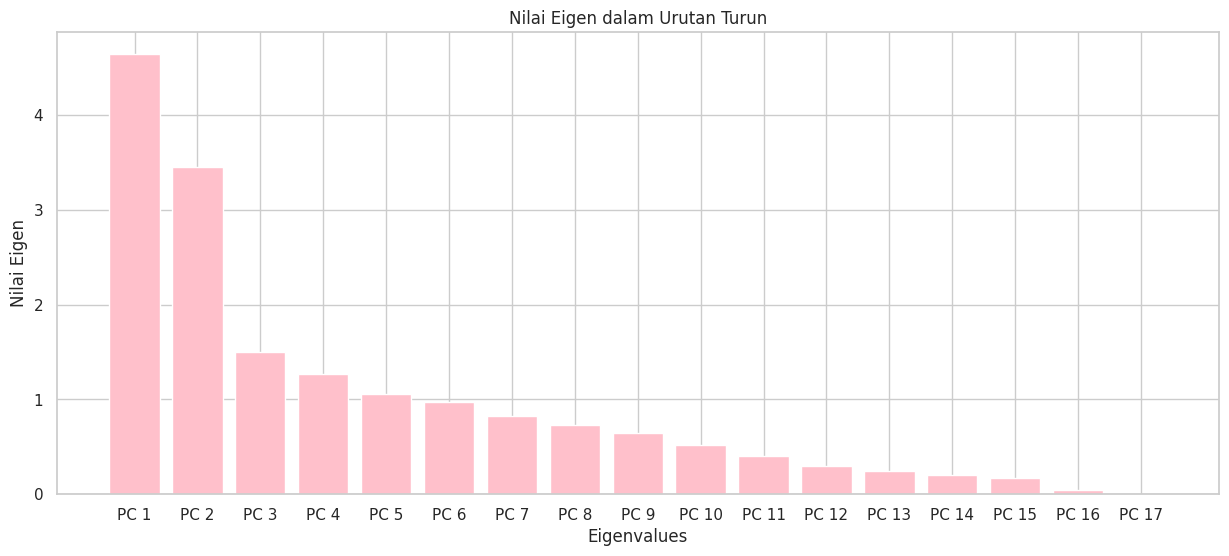

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(range(len(eig_vals)), [pair[0] for pair in eigen_pairs], align='center', color='pink')
plt.xticks(range(len(eig_vals)), ['PC {}'.format(i+1) for i in range(len(eig_vals))])
plt.xlabel('Eigenvalues')
plt.ylabel('Nilai Eigen')
plt.title('Nilai Eigen dalam Urutan Turun')

# Menampilkan visualisasi
plt.show()


Dapat diketahui bahwa PC 1 menyimpan informasi lebih besar dari PC lainnya dan didapatkan 18 PC setelah melakukan PCA

In [103]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
var_exp

[27.297671346778024,
 20.313779614506608,
 8.813181701906869,
 7.479524388926108,
 6.224729251149492,
 5.740056449723132,
 4.883425552655536,
 4.299203248451349,
 3.7982586956615854,
 3.0800022680013512,
 2.372251041340385,
 1.7733696363593308,
 1.4278568484632774,
 1.2169195642486939,
 1.0126670296780267,
 0.2670348394706698,
 6.852267957162763e-05]

Hasil intepretasi :
- Komponen utama pertama menjelaskan sekitar 27,30% dari varians total dalam data.
- Komponen utama kedua menjelaskan sekitar 20,31% varians.
- Komponen utama ketiga menjelaskan sekitar 8,81% dari varians, dan seterusnya.

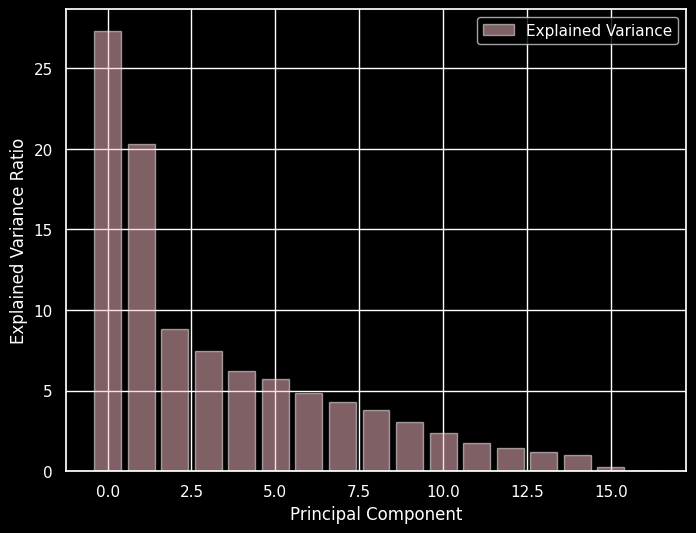

In [104]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,6))
    plt.bar(range(17), var_exp, alpha=0.5,align='center',
           label='Explained Variance', color = 'pink')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.legend(loc='best')
    plt.tight_layout

In [105]:
eigen_pairs[0]

(4.641122690146693,
 array([ 0.10173497,  0.12049041,  0.4115624 ,  0.34633416,  0.33676092,
        -0.02280988,  0.32123217,  0.29449254,  0.27449428, -0.08858206,
        -0.04813551,  0.39059872,  0.21191634,  0.26648154,  0.06326867,
         0.13183285,  0.0810856 ]))

In [106]:
matrix_w = np.hstack((eigen_pairs[0][1].reshape(17,1),
                      eigen_pairs[1][1].reshape(17,1),
                      eigen_pairs[2][1].reshape(17,1),
                      eigen_pairs[3][1].reshape(17,1),
                      eigen_pairs[4][1].reshape(17,1),
                      eigen_pairs[5][1].reshape(17,1),
                      eigen_pairs[6][1].reshape(17,1),
                     ))
print('Matrix_w:\n', matrix_w)

Matrix_w:
 [[ 0.10173497  0.40381873 -0.16163198 -0.27931641  0.05102225  0.04275156
   0.25418163]
 [ 0.12049041  0.13134414 -0.42299545 -0.15576173 -0.4768362   0.02204495
  -0.10080086]
 [ 0.4115624   0.04002462  0.25747423 -0.04162083  0.02788702  0.18045255
  -0.20022048]
 [ 0.34633416  0.06191772  0.39089919 -0.08507909 -0.16083881  0.17998375
  -0.1206849 ]
 [ 0.33676092 -0.01917539 -0.10926846  0.05791521  0.36140247  0.09600344
  -0.2517713 ]
 [-0.02280988  0.43902651 -0.02312809  0.25659565  0.09756007 -0.14501811
   0.0487302 ]
 [ 0.32123217 -0.19114801 -0.37139443  0.19456427 -0.0996674  -0.04686705
   0.15081803]
 [ 0.29449254 -0.01856091  0.11556486 -0.03427937 -0.54033045 -0.00352356
   0.28143231]
 [ 0.27449428 -0.17886875 -0.46957883  0.22528752  0.17699607 -0.04805088
  -0.03800288]
 [-0.08858206  0.43412117 -0.10470904  0.26462842 -0.14516024  0.05818276
  -0.14422042]
 [-0.04813551  0.41964355 -0.11034514  0.32838559 -0.08388357 -0.06463094
  -0.1987376 ]
 [ 0.39059

In [107]:
hasil = X.dot(matrix_w)
hasil

array([[-1.68364879, -1.07224148,  0.47566008, ...,  0.04319508,
         0.06806942, -0.82215526],
       [-1.13408493,  2.50914981,  0.60221631, ...,  0.66263777,
        -1.10225463,  0.38428208],
       [ 0.96939499, -0.3835769 ,  0.09096976, ..., -2.16658421,
        -0.32018501,  1.54249644],
       ...,
       [-0.92898512, -1.80804835, -0.45824238, ...,  0.23461525,
         2.98078368,  1.4032653 ],
       [-2.33784475, -0.65361133,  0.98283115, ..., -0.0702759 ,
         3.17948406,  0.97353358],
       [-0.55802653, -0.4006461 ,  1.0336456 , ..., -1.44034346,
         3.67556151,  1.4192505 ]])

In [108]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)

<ipython-input-109-55cff1c2dc15>:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,17,1)


Text(0, 0.5, 'Explained Ratio Cumulative')

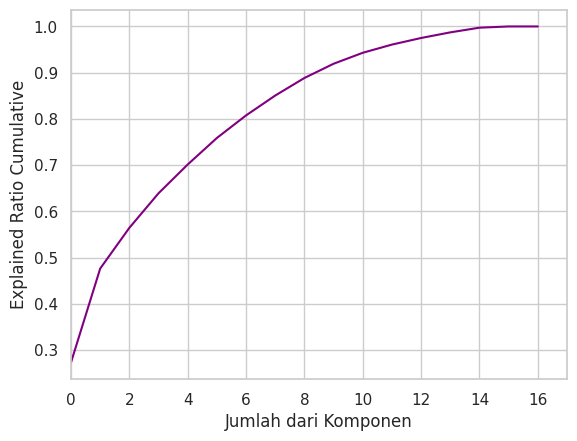

In [109]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='purple')
plt.xlim(0,17,1)
plt.xlabel('Jumlah dari Komponen')
plt.ylabel('Explained Ratio Cumulative')

In [110]:
# mengubah ke penyimpanan 95% informasi -> n_components=0.95
model_pca = PCA(n_components=0.95)
Y_pca = model_pca.fit_transform(X)
print(Y_pca)

[[-1.68364879e+00 -1.07224148e+00  4.75660084e-01 ... -7.81956004e-02
  -2.35948299e-01 -5.24972248e-02]
 [-1.13408493e+00  2.50914981e+00  6.02216308e-01 ... -7.77929470e-01
  -8.70746073e-01 -6.07171068e-01]
 [ 9.69394988e-01 -3.83576903e-01  9.09697616e-02 ... -1.74404835e-03
  -7.62170193e-01  6.83869942e-01]
 ...
 [-9.28985122e-01 -1.80804835e+00 -4.58242377e-01 ... -8.30135631e-01
   1.20175848e-01  7.31414169e-02]
 [-2.33784475e+00 -6.53611332e-01  9.82831153e-01 ...  2.68662638e-01
  -3.06599164e-01 -1.13268706e-01]
 [-5.58026533e-01 -4.00646098e-01  1.03364560e+00 ...  3.46160674e-01
  -5.05323873e-01  1.22672594e-01]]


Hasil intepretasi :

Setelah menerapkan PCA dengan menyimpan 95% informasi, data yang baru (diwakili oleh Y_pca) memiliki dimensi yang lebih rendah dibandingkan dengan data asli. Tiap baris dalam Y_pca mewakili satu sampel dari data setelah dikurangi dimensinya.
- Baris Pertama: Koordinat dalam ruang baru untuk sampel pertama. Contohnya, nilai pertama mungkin -1.68, nilai kedua -1.07, dan seterusnya.
- Baris Kedua: Koordinat dalam ruang baru untuk sampel kedua.
- Setiap Baris: Merepresentasikan sampel data setelah dikurangi dimensinya.

In [111]:
pca.get_covariance()

array([[ 1.00011174,  0.32244833,  0.181281  ,  0.16436802,  0.12648316,
         0.49674704, -0.07795245,  0.07317426, -0.06319282,  0.44926823,
         0.38519531,  0.15435561,  0.53135553,  0.32283773,  0.39796451,
        -0.31899484,  0.07270039],
       [ 0.32244833,  1.00011174,  0.13368937,  0.10433488,  0.12430607,
         0.0993991 ,  0.22974114,  0.20243794,  0.17609907,  0.19189412,
         0.14157068,  0.18964713,  0.095942  ,  0.06501513,  0.13119544,
        -0.09509307,  0.11978927],
       [ 0.181281  ,  0.13368937,  1.00011174,  0.91694701,  0.67997219,
        -0.05147997,  0.39306135,  0.49848543,  0.31560195, -0.12015662,
        -0.06718279,  0.68963789,  0.35701681,  0.60333124,  0.09579955,
         0.18039922,  0.08629784],
       [ 0.16436802,  0.10433488,  0.91694701,  1.00011174,  0.33065849,
        -0.0313292 ,  0.26496691,  0.52494974,  0.12774338, -0.08263698,
        -0.04621732,  0.54558424,  0.3197705 ,  0.56735501,  0.05026187,
         0.1327776 

In [112]:
pca.explained_variance_ratio_

array([2.72976713e-01, 2.03137796e-01, 8.81318170e-02, 7.47952439e-02,
       6.22472925e-02, 5.74005645e-02, 4.88342555e-02, 4.29920325e-02,
       3.79825870e-02, 3.08000227e-02, 2.37225104e-02, 1.77336964e-02,
       1.42785685e-02, 1.21691956e-02, 1.01266703e-02, 2.67034839e-03,
       6.85226796e-07])

In [113]:
pca.explained_variance_.reshape(17,1)

array([[4.64112269e+00],
       [3.45372843e+00],
       [1.49840831e+00],
       [1.27166123e+00],
       [1.05832222e+00],
       [9.75918638e-01],
       [8.30275112e-01],
       [7.30946222e-01],
       [6.45776132e-01],
       [5.23658895e-01],
       [4.03327742e-01],
       [3.01506526e-01],
       [2.42762789e-01],
       [2.06899443e-01],
       [1.72172632e-01],
       [4.54009954e-02],
       [1.16501572e-05]])

In [114]:
pca.components_

array([[ 1.01734968e-01,  1.20490410e-01,  4.11562397e-01,
         3.46334163e-01,  3.36760924e-01, -2.28098772e-02,
         3.21232166e-01,  2.94492540e-01,  2.74494280e-01,
        -8.85820623e-02, -4.81355110e-02,  3.90598721e-01,
         2.11916336e-01,  2.66481544e-01,  6.32686675e-02,
         1.31832855e-01,  8.10855965e-02],
       [ 4.03818730e-01,  1.31344137e-01,  4.00246231e-02,
         6.19177177e-02, -1.91753878e-02,  4.39026509e-01,
        -1.91148008e-01, -1.85609087e-02, -1.78868750e-01,
         4.34121168e-01,  4.19643548e-01, -2.01682139e-02,
         2.38028492e-01,  2.56715645e-01,  1.69065805e-01,
        -1.90065293e-01, -4.25523962e-03],
       [-1.61631980e-01, -4.22995451e-01,  2.57474232e-01,
         3.90899189e-01, -1.09268458e-01, -2.31280858e-02,
        -3.71394431e-01,  1.15564861e-01, -4.69578828e-01,
        -1.04709043e-01, -1.10345140e-01, -7.59293690e-02,
         1.00681745e-01,  2.77358656e-01, -2.34516638e-01,
         1.26477243e-01, -6.7

In [115]:
# Membuat dataframe baru menggunakan hasil transformasi PCA
df_pca = pd.DataFrame(data=Y_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,0.822155,-0.018952,0.118336,-0.078196,-0.235948,-0.052497
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,-0.384282,0.176154,0.674472,-0.777929,-0.870746,-0.607171
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,-1.542496,-0.229364,-0.867803,-0.001744,-0.762170,0.683870
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,-0.236644,-0.690410,-0.064245,0.393690,0.747670,0.119186
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,0.698278,0.245311,0.578032,-0.122073,-0.455167,-0.108719
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.362572,-2.013437,-0.975609,-2.742418,0.124714,2.673427,-1.561393,0.277404,1.371131,-0.845167,0.194939,0.020982
8946,-0.580810,-1.675663,-1.222354,-1.980537,-0.073504,3.312539,-1.068590,-0.639929,0.940227,-1.245566,0.069507,0.458772
8947,-0.928985,-1.808048,-0.458242,-2.296301,0.234615,2.980784,-1.403265,-0.292832,0.810029,-0.830136,0.120176,0.073141
8948,-2.337845,-0.653611,0.982831,-1.847692,-0.070276,3.179484,-0.973534,0.230863,1.205675,0.268663,-0.306599,-0.113269


# Kmeans

Dalam data ini menggunakan K-Means, karena K-Means dapat digunakan untuk mengelompokkan pelanggan berdasarkan perilaku pembelian atau karakteristik keuangan, sehingga perusahaan dapat menyusun strategi pemasaran yang lebih efektif untuk setiap segmen.



In [116]:
from sklearn.cluster import KMeans

In [117]:
kmeans = KMeans(n_clusters=2,
                init='k-means++',
                n_init='auto',
                max_iter=500,
                tol=0.0001)

In [118]:
kmeans.fit(X)

KMeans(max_iter=500, n_clusters=2, n_init='auto')

In [119]:
kmeans.cluster_centers_

array([[ 0.28471659,  0.43300243,  1.11365038,  0.90065805,  0.97806108,
        -0.10241822,  1.11651096,  1.29873757,  0.88132182, -0.26345217,
        -0.14747653,  1.274204  ,  0.74438478,  0.64793271,  0.15200874,
         0.44786779,  0.27922863],
       [-0.07388367, -0.1123637 , -0.28899118, -0.23371988, -0.25380589,
         0.02657743, -0.28973349, -0.33702112, -0.22870215,  0.06836558,
         0.03827001, -0.33065468, -0.19316712, -0.1681379 , -0.03944612,
        -0.11622125, -0.07245956]])

In [120]:
kmeans.inertia_

128953.77462053049

# Elbow

In [121]:
cs = []
for i in range (1,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

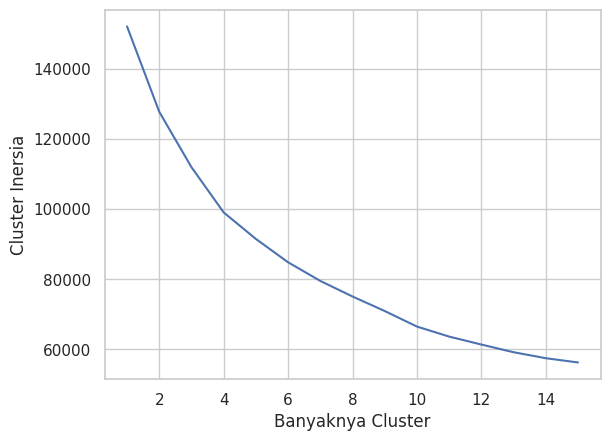

In [122]:
plt.plot(range(1,16),cs)
plt.xlabel('Banyaknya Cluster')
plt.ylabel('Cluster Inersia')
plt.show()

In [123]:
result=[]
for i in range (1, len(cs)):
    del_cs = cs[i]-cs[i-1]
    result.append(del_cs)

In [124]:
result

[-24365.426855929953,
 -15810.538072155003,
 -12912.095229624858,
 -7570.82730996536,
 -6664.52050149026,
 -5320.103262506062,
 -4443.805187529302,
 -4144.808247648631,
 -4434.789719573659,
 -2868.337037137433,
 -2268.1698582991085,
 -2190.8086627492303,
 -1710.3067690198513,
 -1212.247941826281]

Hasil interpretasi :

Setelah memplot inersia untuk nilai k dari 1 hingga 15, kita melihat bahwa grafik menunjukkan penurunan inersia yang cepat hingga sekitar k=4, dan setelah itu, penurunan inersia tidak secepat sebelumnya (tidak ada penurunan yang signifikan).

Dengan demikian, kesimpulan yang dapat diambil adalah bahwa jumlah kluster optimal untuk dataset ini kemungkinan adalah 4, karena setelah nilai ini, penurunan inersia tidak signifikan lagi, membentuk suatu "elbow" dalam plot. Oleh karena itu, menggunakan 4 kluster dalam analisis KMeans untuk membagi data ini.

In [125]:
kmeans = KMeans(n_clusters=4).fit(X)
z = kmeans.predict(X)
z

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 1, 0, ..., 0, 3, 3], dtype=int32)

In [126]:
cluster_labels = kmeans.fit_predict(Y_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


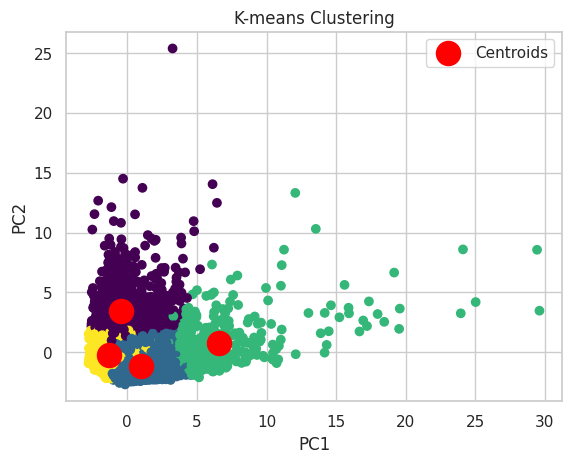

In [127]:
# Visualisasi data hasil klaster
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

Hasil Interpretasi :
- Plot memperlihatkan pembagian data ke dalam empat kluster berdasarkan fitur-fitur yang ada.
- Pusat kluster ditunjukkan oleh titik merah, memberikan gambaran tentang lokasi pusat dari masing-masing kluster.

# SOM

Self-Organizing Maps (SOM), atau Peta Pengorganisasian Diri, merupakan jenis Jaringan Saraf Tiruan yang mampu mengubah hubungan statistik kompleks dan nonlinear antara item data berdimensi tinggi menjadi hubungan geometris yang sederhana pada tampilan berdimensi rendah.

## SOM menggunakan MiniSom

In [128]:
som_shape = (2,2) # jaringan SOM akan memiliki 2 baris dan 2 kolom, sehingga total akan ada 4 unit SOM.
som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=.5, learning_rate=.05,
neighborhood_function='gaussian', random_seed=7)

som.train_batch(X, 500, verbose=True)


 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 3.0249752803667374


In [129]:
winner_condition = np.array([som.winner(x) for x in X]).T
winner_condition

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [130]:
cluster_index = np.ravel_multi_index(winner_condition, som_shape)
cluster_index

array([0, 1, 3, ..., 0, 0, 0])

In [131]:
w = som.get_weights()
w

array([[[-0.39319857, -0.28524412, -0.18329325, -0.18217859,
         -0.09703505, -0.35798518, -0.22614114, -0.27367119,
         -0.17287017, -0.45351515, -0.35845378, -0.26021349,
         -0.0194007 , -0.23021872, -0.2074912 ,  0.01317836,
          0.17708165],
        [ 1.47976388,  0.41215723, -0.3813901 , -0.26165617,
         -0.3516638 ,  0.99420801, -0.90174105, -0.44534599,
         -0.76349195,  0.9141773 ,  0.63346361, -0.48437764,
          0.75615204,  0.25421235,  0.43308178, -0.46956484,
          0.10773706]],

       [[ 0.65169466,  0.44169013,  1.56744083,  1.15227799,
          1.56624849, -0.27678856,  1.0661859 ,  1.2046349 ,
          1.04676956, -0.4353882 , -0.30423704,  1.56403804,
          1.27718569,  0.91515238,  0.39451383,  0.4114309 ,
          0.30706458],
        [ 0.60360183,  0.33029958,  0.13348813,  0.16185311,
         -0.11087126,  0.79641345,  0.73854467,  0.89600218,
          0.21514019,  0.63076084,  0.53371037,  0.11904134,
          0.39

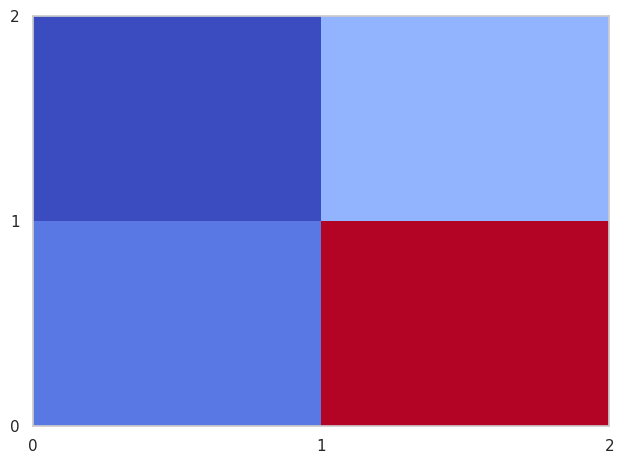

In [132]:
plt.pcolor(w[:,:,2].T,cmap="coolwarm")
plt.xticks(np.arange(som_shape[0]+1))
plt.yticks(np.arange(som_shape[1]+1))

plt.tight_layout()
plt.show()
# plt.figure(figsize=(10,10))
# for i,f in enumarate()

In [133]:
print("Nilai minimum", min(cluster_index))
print("Nilai maximum", max(cluster_index))

Nilai minimum 0
Nilai maximum 3


(array([5476., 1526., 1001.,  947.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

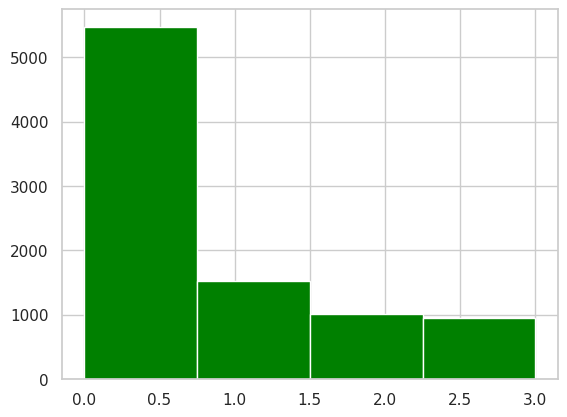

In [134]:
plt.figure()
plt.hist(cluster_index, bins=4, color='green')

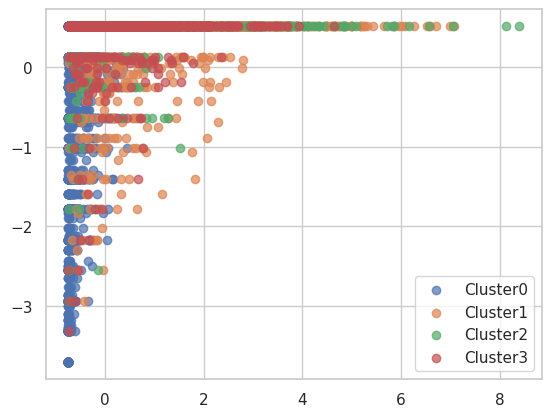

In [135]:
for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c,0],
                X[cluster_index == c,1],
                label='Cluster'+str(c), alpha=.7)
plt.legend()

Dengan melakukan ini, scatter plot memberikan visualisasi tentang bagaimana data terbagi menjadi klaster berbeda. Setiap titik pada plot mewakili suatu pengamatan, dan warna serta label klaster membantu kita mengidentifikasi kelompok yang berbeda. Sebagai contoh, pada plot ini, Cluster 0 ditampilkan dalam warna biru, Cluster 1 dalam warna oranye, Cluster 2 dalam warna hijau, dan Cluster 3 dalam warna merah. Titik-titik yang berdekatan satu sama lain pada plot mungkin termasuk dalam klaster yang sama berdasarkan analisis klaster yang telah dilakukan. Dengan melihat pola dan distribusi titik-titik pada plot, kita dapat mendapatkan wawasan visual tentang bagaimana algoritma klastering telah mengelompokkan data.

In [136]:
columns_name = df.columns.tolist()
columns_name

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

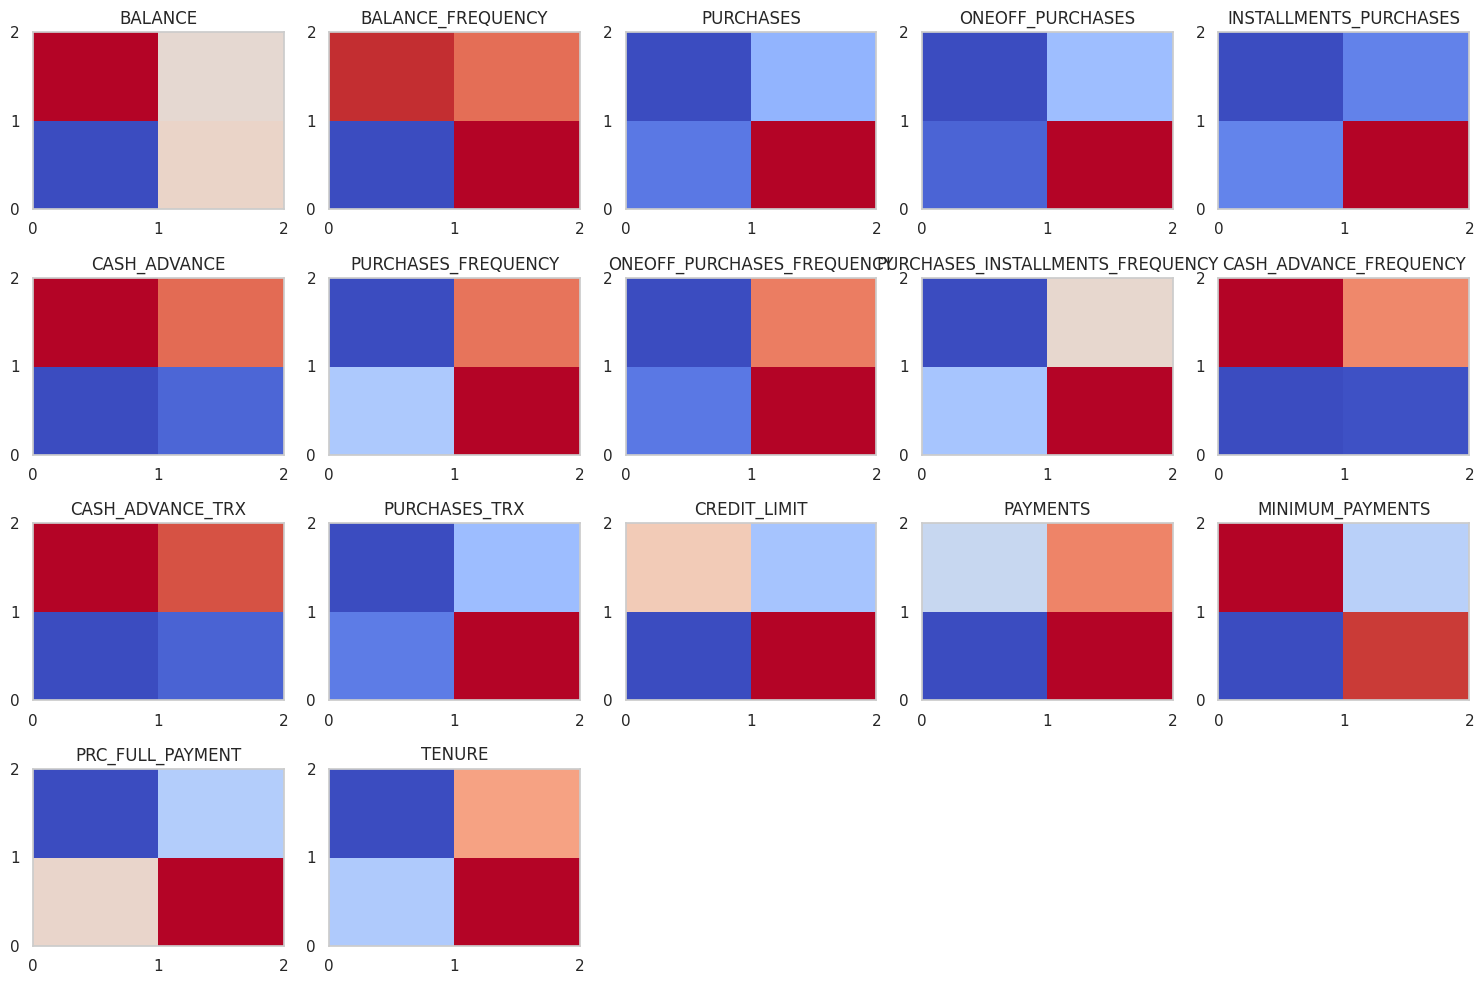

In [137]:
plt.figure(figsize=(15,10))
for i,f in enumerate(columns_name):
    plt.subplot(4,5,i+1)
    plt.title(f)
    plt.pcolor(w[:,:,i].T,cmap="coolwarm")
    plt.xticks(np.arange(som_shape[0]+1))
    plt.yticks(np.arange(som_shape[1]+1))
plt.tight_layout()
plt.show()

Visualisasi peta Self-Organizing Map (SOM) untuk setiap fitur memberikan gambaran yang menarik tentang bagaimana nilai fitur terkelompok dalam ruang dua dimensi. Warna pada setiap subplot mencerminkan pola pengelompokan dan variasi nilai fitur. Misalnya, pada fitur 'Balance', terlihat pengelompokan yang jelas dengan warna merah, biru, dan putih, menunjukkan adanya klaster dengan nilai 'Balance' yang berbeda dan dominan di putih. Pada beberapa fitur seperti 'CASH_ADVANCE' dan 'PURCHASES_FREQUENCY', terlihat pola gradasi yang menunjukkan variasi yang kontinu dalam data. Insight menarik dapat ditemukan pada fitur seperti 'CREDIT_LIMIT', di mana warna putih mewakili kelompok dengan batas kredit yang tinggi, dan 'PAYMENTS' di mana warna merah dan biru mewakili dua kelompok dengan pola pembayaran yang berbeda. Selain itu, terlihat ada kecenderungan warna biru mendominasi pada sebagian besar fitur, menunjukkan adanya pola kesamaan dalam distribusi nilai-fitur yang lebih umum. Secara keseluruhan, visualisasi ini memberikan wawasan yang kaya tentang pola dan struktur dalam data, membantu memahami hubungan antara variabel dan potensi kelompok atau tren yang menarik untuk diinvestigasi lebih lanjut.

# Kesimpulan

## 1. EDA
### Vis 1 - Hubungan antara PURCHASE & CASH ADVANCE

Berdasarkan visualisasi data yang dihasilkan, dapat disimpulkan bahwa mayoritas pelanggan cenderung memiliki pola transaksi yang konservatif, dengan pembelian dan penarikan tunai dalam volume yang lebih rendah. Secara umum, tidak terlihat korelasi yang kuat antara volume pembelian dan penarikan tunai, menunjukkan bahwa kebanyakan pelanggan tidak cenderung melakukan penarikan tunai seiring dengan pembelian mereka. Meskipun demikian, terdapat sejumlah pelanggan yang menonjol dengan pembelian dan penarikan tunai dalam volume tinggi. Keberadaan kelompok pelanggan ini menunjukkan bahwa ada variasi dalam perilaku keuangan, di mana sebagian besar pelanggan memilih untuk meminimalkan penarikan tunai mereka, sementara sejumlah kecil pelanggan lebih cenderung melakukan transaksi besar dengan penarikan tunai yang sebanding.

### Vis 2 - Hubungan antara BALANCE dan PURCHASES dengan Regresi
   Berdasarkan interpretasi hasil analisis, terlihat adanya korelasi positif antara saldo dan total pembelian, yang diperkuat oleh tren naik garis regresi pada scatter plot. Ini menunjukkan bahwa pelanggan dengan saldo lebih tinggi cenderung melakukan pembelian dengan jumlah yang lebih besar. Namun, ditemukan juga ketidakteraturan dalam hubungan tersebut, terlihat dari sejumlah besar titik data yang tersebar luas dan tidak mengikuti pola garis regresi. Hal ini dapat mengindikasikan beberapa kemungkinan, seperti kurangnya korelasi yang kuat secara umum atau adanya faktor-faktor lain yang memengaruhi perilaku pembelian pelanggan selain dari saldo. Oleh karena itu, kesimpulan utama adalah bahwa sementara saldo memiliki indikasi kuat tentang hubungan dengan total pembelian, faktor-faktor lain kemungkinan juga memainkan peran penting dalam menentukan perilaku pembelian pelanggan.

### Vis 3 Perbandingan Proporsi One-off dengan Installmen Purchess
   Berdasarkan hasil interpretasi dari diagram pie yang menunjukkan proporsi pembelian, dapat disimpulkan bahwa pembelian sekali (One-Off Purchases) mendominasi proporsi total pembelian, menyumbang sekitar 59.0% dari total keseluruhan. Meskipun pembelian angsuran (Installment Purchases) jumlahnya lebih sedikit, sebesar 41.0%, namun memiliki andil yang signifikan dalam total pembelian. Kesimpulan utamanya adalah bahwa sebagian besar pembelian dilakukan dalam kategori sekali bayar, tetapi pembelian dengan skema angsuran juga memegang peran yang cukup penting. Informasi ini dapat menjadi dasar strategis dalam perencanaan pemasaran, penjualan, dan layanan pelanggan, terutama dalam mengakomodasi preferensi pembayaran konsumen.
### Vis 4 - Distribusi BALANCE berdasarkan TENURE
  Berdasarkan hasil interpretasi dari Box Plot yang membandingkan Balance (saldo) berdasarkan Tenure (masa jabatan pelanggan) kesimpulan ini menyoroti adanya perbedaan perilaku keuangan antara pelanggan dengan masa jabatan yang berbeda. Ini dapat menjadi landasan untuk keputusan bisnis terkait strategi pemasaran, penawaran produk, atau layanan yang disesuaikan dengan karakteristik pelanggan berdasarkan masa jabatan mereka.
   
## 2. PCA
Berdasarkan hasil interpretasi PCA, komponen utama pertama menjelaskan sekitar 27,30% varians total, sementara komponen kedua dan ketiga masing-masing menyumbang sekitar 20,31% dan 8,81% varians. Komponen utama pertama dianggap paling penting dalam menjelaskan variasi dalam data, dengan kontribusi informasi yang signifikan. Meskipun komponen lainnya memberikan kontribusi, relevansinya menurun seiring dengan nomor komponen yang lebih tinggi. Analisis komponen utama dapat membantu pemilihan fitur yang paling penting dalam pemodelan atau analisis data. Penggunaan PCA untuk mempertahankan 95% informasi telah menghasilkan representasi data yang lebih sederhana namun tetap mempertahankan sebagian besar informasi dari data asli. Y_pca, sebagai representasi sampel setelah pengurangan dimensi, memungkinkan analisis lebih lanjut atau pemodelan dengan fitur yang lebih sedikit tetapi masih menjaga informasi yang relevan.
## 3. K-Means
Berdasarkan plot inersia untuk nilai k dari 1 hingga 15, ditemukan bahwa penurunan inersia melambat setelah k=4, menunjukkan adanya "elbow" dalam plot. Oleh karena itu, jumlah kluster optimal untuk dataset ini kemungkinan adalah 4. Hasil analisis K-Means dengan 4 kluster memperlihatkan pembagian data yang efektif berdasarkan fitur-fitur yang ada. Scatter plot hasil klustering menampilkan setiap sampel dalam data dengan warna yang mencerminkan kluster yang ditetapkan oleh K-Means, dan pusat kluster ditandai dengan titik merah besar. Kesimpulan ini memberikan wawasan tentang struktur data setelah dilakukan pengelompokkan, yang dapat disesuaikan dengan tujuan analisis atau konteks spesifik dataset tersebut.
## 4. SOM

Berdasarkan hasil analisis klastering dan visualisasi peta Self-Organizing Map (SOM), kita dapat menyimpulkan beberapa temuan yang signifikan. Scatter plot klastering memberikan gambaran jelas tentang pembagian data ke dalam kelompok-kelompok yang dapat diidentifikasi, dengan warna dan label klaster membantu mengidentifikasi pola-pola yang muncul. Terlihat bahwa sebagian besar pelanggan cenderung memiliki perilaku keuangan yang serupa, sementara sejumlah kecil pelanggan memperlihatkan kecenderungan unik. Sementara itu, visualisasi SOM untuk setiap fitur mengungkapkan pola distribusi nilai-fitur yang kompleks dan memberikan wawasan tentang bagaimana fitur-fitur tersebut terkelompok dalam ruang dua dimensi. Adanya variasi dan pola yang dapat ditemukan pada fitur tertentu, seperti 'Balance' atau 'CREDIT_LIMIT', menunjukkan adanya potensi untuk pengembangan strategi pemasaran atau manajemen risiko yang lebih terfokus.